In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [257]:
df = pd.read_csv('energy_dataset.csv')

In [258]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [259]:
# Convert datetime to int
df['time'] = pd.to_datetime(df['time'], utc=True).astype(int) / 10**9
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,1.420067e+09,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,1.420070e+09,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,1.420074e+09,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,1.420078e+09,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,1.420081e+09,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [260]:
df.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [261]:
# Missing values
 
# Replace missing values using linear interpolation
df = df.interpolate(method='linear', axis=0).ffill().bfill()
df.isnull().sum()

time                                               0
generation biomass                                 0
generation fossil brown coal/lignite               0
generation fossil coal-derived gas                 0
generation fossil gas                              0
generation fossil hard coal                        0
generation fossil oil                              0
generation fossil oil shale                        0
generation fossil peat                             0
generation geothermal                              0
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption        0
generation hydro run-of-river and poundage         0
generation hydro water reservoir                   0
generation marine                                  0
generation nuclear                                 0
generation other                                   0
generation other renewable                         0
generation solar                              

In [262]:
# Drop irrevelent columns

# Drop forecase columns
df = df.drop(columns=['forecast solar day ahead', 'forecast wind offshore eday ahead', 'forecast wind onshore day ahead', 'total load forecast', 'price day ahead'])

# Drop columns with only zeros
df = df.loc[:, (df != 0).any(axis=0)]

# Drop empty columns
df = df.dropna(how='all', axis=1)

df.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load actual                              0
price actual                                   0
dtype: int64

In [263]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual
0,1.420067e+09,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41
1,1.420070e+09,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92
2,1.420074e+09,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48
3,1.420078e+09,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32
4,1.420081e+09,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04


In [264]:
# Outlier Detection

# Detection using interquartile range
def iqr (s, k=1.5, thresholds=False):
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    
    if thresholds:
        return lower, upper
    else:
        # Identify outliers
        return [True if x < lower or x > upper else False for x in s]

# Create df showing outliers
ds = df.drop(columns=['time'], axis=1)
iqr_df = ds.apply(iqr, k=1.5) 

iqr_df.head(10)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [265]:
# Replace with nulls
for column in ds:
    ds[column] = np.where(iqr_df[column] == True, 'NaN', ds[column])
    
cols = ds.columns
ds[cols] = ds[cols].apply(pd.to_numeric, errors='coerce') 
ds.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual
0,447.0,329.0,4844.0,4821.0,NaN,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41
1,449.0,328.0,5196.0,4755.0,NaN,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92
2,448.0,323.0,4857.0,4581.0,NaN,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48
3,438.0,254.0,4314.0,4131.0,NaN,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32
4,428.0,187.0,4130.0,3840.0,NaN,NaN,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04


In [266]:
# Fill the nulls
ds = ds.interpolate(method='linear', axis=0).ffill().bfill()
df = pd.concat([df['time'], ds], axis=1)
df.head(10)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual
0,1.420067e+09,447.0,329.0,4844.0,4821.0,163.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41
1,1.420070e+09,449.0,328.0,5196.0,4755.0,163.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92
2,1.420074e+09,448.0,323.0,4857.0,4581.0,163.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48
3,1.420078e+09,438.0,254.0,4314.0,4131.0,163.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32
4,1.420081e+09,428.0,187.0,4130.0,3840.0,163.0,1463.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04
5,1.420085e+09,410.0,178.0,4038.0,3590.0,163.0,1423.0,952.0,743.0,7098.0,43.0,74.0,34.0,188.0,4618.0,19905.0,53.63
6,1.420088e+09,401.0,172.0,4040.0,3368.0,163.0,1383.0,961.0,848.0,7098.0,43.0,74.0,34.0,186.0,4397.0,20010.0,51.73
7,1.420092e+09,408.0,172.0,4030.0,3208.0,163.0,1343.0,983.0,1012.0,7099.0,43.0,72.0,35.0,189.0,3992.0,20377.0,51.43
8,1.420096e+09,413.0,177.0,4052.0,3335.0,163.0,1303.0,1001.0,1015.0,7098.0,43.0,73.0,54.0,198.0,3629.0,20094.0,48.98
9,1.420099e+09,419.0,177.0,4137.0,3437.0,163.0,1263.0,1041.0,1357.0,7097.0,43.0,74.0,743.0,198.0,3073.0,20637.0,54.20


In [267]:
# Drop columns with only zeros
df = df.loc[:, (df != 0).any(axis=0)]

# Drop colunms with the same values
df = df.drop(df.std()[(df.std() == 0)].index, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  float64
 1   generation biomass                           35064 non-null  float64
 2   generation fossil brown coal/lignite         35064 non-null  float64
 3   generation fossil gas                        35064 non-null  float64
 4   generation fossil hard coal                  35064 non-null  float64
 5   generation fossil oil                        35064 non-null  float64
 6   generation hydro pumped storage consumption  35064 non-null  float64
 7   generation hydro run-of-river and poundage   35064 non-null  float64
 8   generation hydro water reservoir             35064 non-null  float64
 9   generation nuclear                           35064 non-null  float64
 10

In [268]:
# We will create two models

# 1. Predict 'total load actual'
# 2. Predict 'price actual'

df_load = df.drop(columns=['price actual'])
df_price = df.drop(columns=['total load actual'])

In [269]:
# Check column correlation
def classifyColumnBasedOnCorrWithTarget(df,target,threshold):
    negCorrCol = []
    posCorrCol = []
    negCorr = []
    posCorr = []
    lessCorrCols = []
    for col in list(df):
        if(df[col].dtype == np.float64 or df[col].dtype == np.int64) and (col!=target):
            corr = df[col].corr(df[target])
            if corr > threshold:
                posCorr.append(df[col].corr(df[target]))
                posCorrCol.append(col)
            else:
                if corr < -threshold:
                    negCorr.append(df[col].corr(df[target]))
                    negCorrCol.append(col)
                else:
                    lessCorrCols.append(col)
    posCorrCols = [x for _,x in sorted(zip(posCorr,posCorrCol),reverse=True)]
    negCorrCols = [x for _,x in sorted(zip(negCorr,negCorrCol))]
    return negCorrCols, lessCorrCols, posCorrCols

# total actual load
negCorrCols_l, lessCorrCols_l, posCorrCols_l = classifyColumnBasedOnCorrWithTarget(df_load, 'total load actual', 0.02)

# price actual
negCorrCols_p, lessCorrCols_p, posCorrCols_p = classifyColumnBasedOnCorrWithTarget(df_price, 'price actual', 0.02)

In [270]:
# total actual load
print('Weakly correlated columns: ')
lessCorrCols_l

Weakly correlated columns: 


[]

In [271]:
# price actual
print('Weakly correlated columns: ')
lessCorrCols_p

Weakly correlated columns: 


[]

In [272]:
# Drop weakly correlated columns

# total actual load
for col in lessCorrCols_l:
    df_load = df_load.drop(col, 1)
    
# price actual
for col in lessCorrCols_p:
    df_price = df_price.drop(col, 1)

In [273]:
# Drop any columns with too high a Percentage of Unique Values or too high a number of Distinct Values

def countDistinctUniqueValues(df, colName):
    # counts the number of distinct values with only one instance 
    numberOfInstances = df[colName].count()
    countInstancesForEachDistinctValue = df[colName].value_counts()
    countDistinct = df[colName].nunique()       # counts the number of distinct values of your column (SELECT DISTINCT ...)
    countUnique = 0                             # counts the number of distinct values with only one instance
    for y in countInstancesForEachDistinctValue:
        if y == 1:
            countUnique+=1
    percentage = round(countUnique/ numberOfInstances*100,2) # percentage of instances having a value for this attribute that no other instances have in the data.
    return countDistinct,countUnique,percentage

def deleteColumnWithHighPercentageUniqueValues(df, uniq_perc_threshold, dist_count_threshold):
    for colName in df.columns:
        distinct, unique, percentage  = countDistinctUniqueValues(df,colName)
        print(colName+' has datatype of '+ str(df[colName].dtype)+' with:d,u,p(u)='+str(distinct)+','+str(unique)+','+str(percentage)+'!')
        if (str(df[colName].dtype)=='object') and (percentage > uniq_perc_threshold or distinct > dist_count_threshold):
            print(colName+'-------will be dropped------------------------------')
    # to only list these columns without dropping them, comment-out the line below and then run this cell...
            df = df.drop(colName,axis=1)
    return df

df_load = deleteColumnWithHighPercentageUniqueValues(df_load,65,1100)
df_price = deleteColumnWithHighPercentageUniqueValues(df_price,65,1100)

time has datatype of float64 with:d,u,p(u)=35064,35064,100.0!
generation biomass has datatype of float64 with:d,u,p(u)=481,78,0.22!
generation fossil brown coal/lignite has datatype of float64 with:d,u,p(u)=964,59,0.17!
generation fossil gas has datatype of float64 with:d,u,p(u)=8574,3175,9.05!
generation fossil hard coal has datatype of float64 with:d,u,p(u)=7279,618,1.76!
generation fossil oil has datatype of float64 with:d,u,p(u)=455,165,0.47!
generation hydro pumped storage consumption has datatype of float64 with:d,u,p(u)=4372,2709,7.73!
generation hydro run-of-river and poundage has datatype of float64 with:d,u,p(u)=1697,56,0.16!
generation hydro water reservoir has datatype of float64 with:d,u,p(u)=7012,1292,3.68!
generation nuclear has datatype of float64 with:d,u,p(u)=2429,669,1.91!
generation other has datatype of float64 with:d,u,p(u)=851,648,1.85!
generation other renewable has datatype of float64 with:d,u,p(u)=86,11,0.03!
generation solar has datatype of float64 with:d,u,p

In [274]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  float64
 1   generation biomass                           35064 non-null  float64
 2   generation fossil brown coal/lignite         35064 non-null  float64
 3   generation fossil gas                        35064 non-null  float64
 4   generation fossil hard coal                  35064 non-null  float64
 5   generation fossil oil                        35064 non-null  float64
 6   generation hydro pumped storage consumption  35064 non-null  float64
 7   generation hydro run-of-river and poundage   35064 non-null  float64
 8   generation hydro water reservoir             35064 non-null  float64
 9   generation nuclear                           35064 non-null  float64
 10

In [275]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  float64
 1   generation biomass                           35064 non-null  float64
 2   generation fossil brown coal/lignite         35064 non-null  float64
 3   generation fossil gas                        35064 non-null  float64
 4   generation fossil hard coal                  35064 non-null  float64
 5   generation fossil oil                        35064 non-null  float64
 6   generation hydro pumped storage consumption  35064 non-null  float64
 7   generation hydro run-of-river and poundage   35064 non-null  float64
 8   generation hydro water reservoir             35064 non-null  float64
 9   generation nuclear                           35064 non-null  float64
 10

In [276]:
# Split the data
# 70-30 split

# Number of rows
num_row_l = len(df_load.index)
num_row_p = len(df_price.index)

# total actual load
train_l = df_load.iloc[0:int(num_row_l*0.7)]
test_l = df_load.iloc[int(num_row_l*0.7):]

# price actual
train_p = df_price.iloc[0:int(num_row_p*0.7)]
test_p = df_price.iloc[int(num_row_p*0.7):]

In [277]:
# total actual load
Y_test_l = test_l.iloc[:, len(df_load.columns)-1:]
Y_test_l.head()

,total load actual
24544,29787.0
24545,29732.0
24546,30957.0
24547,32728.0
24548,31680.0


In [278]:
# price actual
Y_test_p = test_p.iloc[:, len(df_price.columns)-1:]
Y_test_p.head()

,price actual
24544,63.91
24545,69.08
24546,69.63
24547,74.72
24548,70.42


In [279]:
# total actual load
X_train_l = train_l.iloc[:,0:len(df_load.columns)-1].values
Y_train_l = train_l.iloc[:, len(df_load.columns)-1:].values

X_test_l = test_l.iloc[:,0:len(df_load.columns)-1].values
Y_test_l = test_l.iloc[:, len(df_load.columns)-1:].values

# price actual
X_train_p = train_p.iloc[:,0:len(df_price.columns)-1].values
Y_train_p = train_p.iloc[:, len(df_price.columns)-1:].values

X_test_p = test_p.iloc[:,0:len(df_price.columns)-1].values
Y_test_p = test_p.iloc[:, len(df_price.columns)-1:].values

In [280]:
# Decision Tree Regression

# total actual load
regressor_l = DecisionTreeRegressor(random_state=0)
regressor_l.fit(X_train_l, Y_train_l)

# price actual
regressor_p = DecisionTreeRegressor(random_state=0)
regressor_p.fit(X_train_p, Y_train_p)

DecisionTreeRegressor(random_state=0)

In [281]:
# total actual load
y_pred_l = regressor_l.predict(X_test_l)
y_pred_l

array([29632., 29632., 30797., ..., 27278., 27461., 29980.])

In [282]:
# price actual
y_pred_p = regressor_p.predict(X_test_p)
y_pred_p

array([60.28, 61.02, 80.51, ..., 77.38, 77.38, 77.38])

In [283]:
# Model Evaluation

# total actual load
r_squared_l = r2_score(Y_test_l, y_pred_l)
mae_l = mean_absolute_error(Y_test_l, y_pred_l)
mse_l = mean_squared_error(Y_test_l, y_pred_l)
rmse_l = np.sqrt(mse_l)
print('Total Actual Load')
print('R-Squared: ',r_squared_l)
print('Mean Absolute Error: ',mae_l)
print('Mean Squared Error: ',mse_l)
print('Root Mean Squared Error: ',rmse_l)

print('\n')

# price actual
r_squared_p = r2_score(Y_test_p, y_pred_p)
mae_p = mean_absolute_error(Y_test_p, y_pred_p)
mse_p = mean_squared_error(Y_test_p, y_pred_p)
rmse_p = np.sqrt(mse_p)
print('Price Actual')
print('R-Squared: ',r_squared_p)
print('Mean Absolute Error: ',mae_p)
print('Mean Squared Error: ',mse_p)
print('Root Mean Squared Error: ',rmse_p)

Total Actual Load
R-Squared:  0.6519591817625984
Mean Absolute Error:  2090.451901140684
Mean Squared Error:  7522071.79068441
Root Mean Squared Error:  2742.6395663091444


Price Actual
R-Squared:  -0.2957410038221744
Mean Absolute Error:  10.019855640050697
Mean Squared Error:  181.34210399310223
Root Mean Squared Error:  13.466332239815793


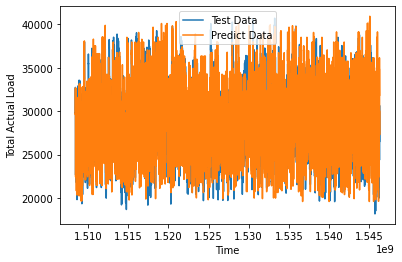

<Figure size 216x216 with 0 Axes>

In [284]:
# time
x_train_l = X_test_l[:,0:1]
# total actual load (test)
y_train_l = Y_test_l

# Test Data Plot
plt.plot(x_train_l, y_train_l, label='Test Data')

# Prediction Data Plot
plt.plot(x_train_l, y_pred_l, label='Predict Data')


plt.xlabel('Time')
plt.ylabel('Total Actual Load')
plt.legend()
plt.figure(figsize=(3, 3))
plt.show()

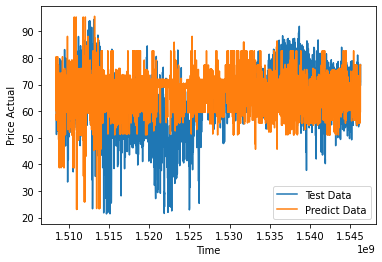

<Figure size 216x216 with 0 Axes>

In [285]:
# time
x_train_p = X_test_p[:,0:1]
# price actual (test)
y_train_p = Y_test_p

# Test Data Plot
plt.plot(x_train_p, y_train_p, label='Test Data')

# Prediction Data Plot
plt.plot(x_train_p, y_pred_p, label='Predict Data')


plt.xlabel('Time')
plt.ylabel('Price Actual')
plt.legend()
plt.figure(figsize=(3, 3))
plt.show()